## Overview:
This notebook will focus on shaping the data in ways that make it satisfactory for the machine learning process. 

### Scale the dataset
In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.

In [1]:
import pandas as pd 
import numpy as np  
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score

In [2]:
# sys.path.append('/Users/Kassi/Desktop/Gender_Recognition_by_Voice')

In [3]:
path = '/Users/Kassi/Desktop/Gender_Recognition_by_Voice/voice.csv'
voice_data = pd.read_csv(path)
print("Total number of samples: {}".format(voice_data.shape[0]))
print("Total number of male: {}".format(voice_data[voice_data.label == 'male'].shape[0]))
print("Total number of female: {}".format(voice_data[voice_data.label == 'female'].shape[0]))
print("Correlation between each feature")

Total number of samples: 3168
Total number of male: 1584
Total number of female: 1584
Correlation between each feature


#### Check dataset contains NA's

In [4]:
voice_data.isnull().any().any()

False

Fortunately, our dataset does not contain any missing values and therefore does not need cleaning.

In [5]:
voice_data = voice_data.values
voices = voice_data[:, :-1] 
labels = voice_data[:, -1:]

In [6]:
gender_encoder = LabelEncoder()
labels = gender_encoder.fit_transform(labels)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# Splitting the dataset into the Training set and Test set
train_x, test_x, train_y, test_y = train_test_split(voices, labels, test_size=0.25, random_state = 42)  

In [8]:
# Feature Scaling
# Learning algorithms benefit from standardization of the data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
%store train_x
%store test_x
%store train_y
%store test_y

Stored 'train_x' (ndarray)
Stored 'test_x' (ndarray)
Stored 'train_y' (ndarray)
Stored 'test_y' (ndarray)


### Principle Component Analysis(PCA)
The number of components is determined by looking at the cumulative explained variance ratio as a function of the number of components

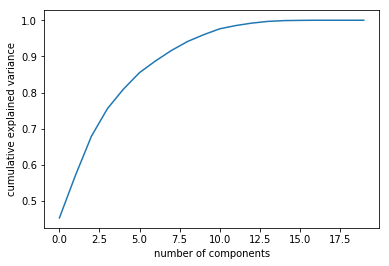

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(train_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

This curve quantifies how much of the total, 20-dimensional variance is contained within the first N components. For example, we see that with the digits the first 5 components contain approximately 85% of the variance, while we need around 10 components to describe close to 100% of the variance.

In [11]:
pca = PCA(n_components=10)
pca.fit(train_x)
transformed_train_x = pca.transform(train_x)
transformed_test_x = pca.transform(test_x)

In [12]:
%store transformed_train_x
%store transformed_test_x

Stored 'transformed_train_x' (ndarray)
Stored 'transformed_test_x' (ndarray)


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


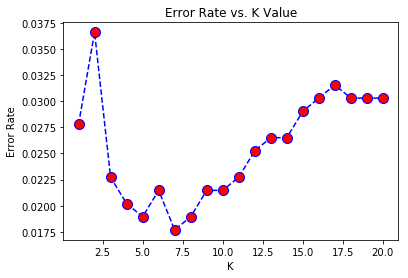

Use KNeighborsClassifier:
Lowest error is 0.0176767676768 occurs at k=7.
k_nearest_neighbour: 0.950760289785845

Use self-written KNeighbors Classifier:
Correct rate is 0.972222222222 when K = 1.
Correct rate is 0.963383838384 when K = 2.
Correct rate is 0.977272727273 when K = 3.
Correct rate is 0.979797979798 when K = 4.
Correct rate is 0.981060606061 when K = 5.
Correct rate is 0.978535353535 when K = 6.
Correct rate is 0.982323232323 when K = 7.
Correct rate is 0.981060606061 when K = 8.
Correct rate is 0.978535353535 when K = 9.
Correct rate is 0.978535353535 when K = 10.
Correct rate is 0.977272727273 when K = 11.
Correct rate is 0.974747474747 when K = 12.
Correct rate is 0.973484848485 when K = 13.
Correct rate is 0.973484848485 when K = 14.
Correct rate is 0.97095959596 when K = 15.
Correct rate is 0.969696969697 when K = 16.
Correct rate is 0.968434343434 when K = 17.
Correct rate is 0.969696969697 when K = 18.
Correct rate is 0.969696969697 when K = 19.
Highest correct rate 

In [13]:
%run 'KNN.ipynb'

In [14]:
# Is it enough of these two features to make predictions? 
## KNN with 2 features ('meanfun', 'IQR')

# train_x_two_features = train_x[:,[5,12]]
# test_x_two_features = test_x[:,[5,12]]

In [15]:
# %run 'SVM.ipynb'

In [16]:
%run 'Random_Forest.ipynb'

The train accuracy is:
0.998737373737
After data scaling, the test accuracy is:
0.97601010101
Confusion matrix is 


NameError: name 'confusion_matrix' is not defined